In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload

# Load dataset 

In [ ]:
# uncomment and run if datastes is not installed
# !pip install datasets

In [ ]:
#!pip install --upgrade pyarrow datasets


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from datasets import load_dataset

ds = load_dataset("maharshipandya/spotify-tracks-dataset")

README.md:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

dataset.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114000 [00:00<?, ? examples/s]

In [ ]:
# transpose into df and get some info
df = ds['train'].to_pandas()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [6]:
# split by track genre
df.track_genre.value_counts(normalize=True)

acoustic             0.008772
punk-rock            0.008772
progressive-house    0.008772
power-pop            0.008772
pop                  0.008772
                       ...   
folk                 0.008772
emo                  0.008772
electronic           0.008772
electro              0.008772
world-music          0.008772
Name: track_genre, Length: 114, dtype: float64

In [7]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# drop na
df.dropna(inplace=True)

In [9]:
# remove null tempos and time sigs
df1 = df[((df.tempo != 0) & (df.time_signature != 0))]

In [10]:
df1.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113836.000000,1.138360e+05,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000
mean,33.233476,2.281096e+05,0.567590,0.642112,5.309199,-8.239513,0.637496,0.084770,0.314642,0.155362,0.213228,0.474725,122.316220,3.909624
std,22.316549,1.063084e+05,0.172379,0.250786,3.559429,4.992758,0.480725,0.105762,0.332332,0.308884,0.189932,0.258841,29.653809,0.406909
min,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,1.000000
25%,17.000000,1.741980e+05,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.430500,4.000000
50%,34.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.998000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000
75%,50.000000,2.615870e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.078000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
df1['mode'].value_counts(normalize=True)

1    0.637496
0    0.362504
Name: mode, dtype: float64

<AxesSubplot:xlabel='tempo', ylabel='Count'>

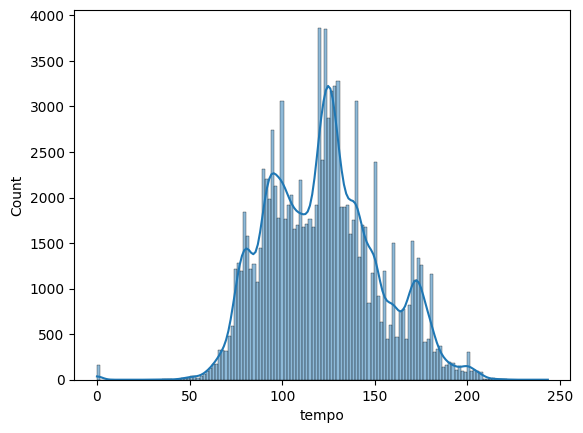

In [12]:
sns.histplot(df.tempo, kde=True)

<AxesSubplot:xlabel='tempo', ylabel='Count'>

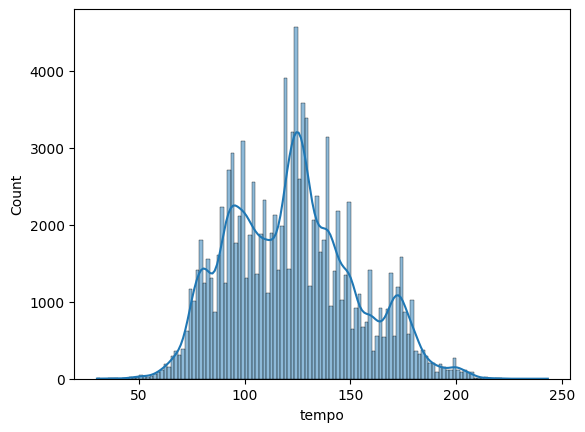

In [13]:
sns.histplot(df1.tempo, kde=True)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

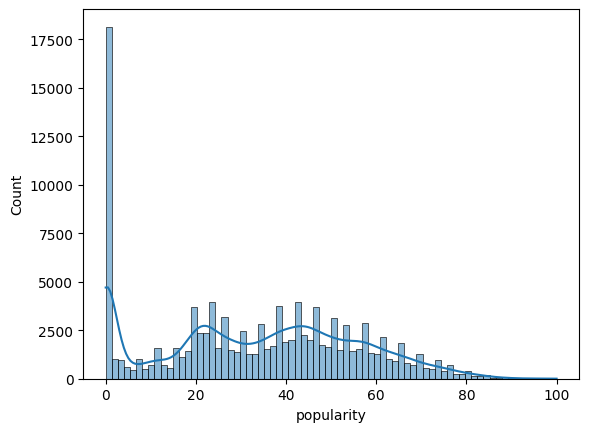

In [14]:
sns.histplot(df1.popularity, kde=True)

In [15]:
df1[df1.popularity==0].sample(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39106,0TNarhIeerCvP5d7W29wXU,Topic;A7S;Lil Baby,pov: it's 2020,Why Do You Lie To Me,0,171290,True,0.6500,0.7380,4,-6.460,0,0.1580,0.0539,0.000000,0.2060,0.3360,119.827,4,german
19734,5z7GGdAezDWdJxBlAM4Hkf,Steppenwolf,On air 70's Hits,Hey Lawdy Mama - Single Version,0,178760,False,0.5890,0.8310,4,-12.373,1,0.0615,0.0195,0.000024,0.0635,0.5110,98.813,4,country
16117,58ina5MM56CHWVlIbXiAZT,Antonio Vivaldi;Gidon Kremer;Leslie Pearson;Lo...,Klassische Weihnachtsmusik,"Violin Concerto in F Minor, Op. 8, No. 4, RV 2...",0,89840,False,0.5130,0.2870,10,-19.716,1,0.0472,0.9760,0.002470,0.0991,0.2650,100.492,4,classical
67085,0w6KXQRbURk23AtKn3q5Wr,Daddy Yankee,Halloween con perreito,RUMBATÓN,0,248768,False,0.6850,0.9090,3,-4.034,0,0.0396,0.0471,0.000000,0.3500,0.9220,95.004,4,latin
30035,0LdrgIn0po8wRxpv2USlys,David Guetta;Bebe Rexha;J Balvin,Dance Dance Dance,Say My Name,0,198946,False,0.7030,0.6600,10,-5.119,0,0.1230,0.1370,0.000000,0.1920,0.7900,95.033,4,edm
23082,0rerkqLNTgHXpHP8NGEaeF,Robin Schulz;Tom Walker;James Carter,Sun Will Shine (James Carter Remix),Sun Will Shine - James Carter Remix,0,188697,False,0.7150,0.7400,4,-7.009,0,0.0434,0.0118,0.000755,0.3130,0.4670,126.004,4,deep-house
91372,4QKt4JmQK1x791t5MSCnFP,Bryan Adams,Christmas Dinner 2022,Christmas Time,0,243057,False,0.5030,0.5820,0,-4.324,1,0.0253,0.4720,0.000000,0.1030,0.3260,77.321,4,rock
8056,4UGYAzxUtzLllltVU4gaS8,Ella Fitzgerald,Holidays Are Coming,Frosty The Snowman,0,131733,False,0.5790,0.5020,8,-7.570,1,0.0513,0.7330,0.000000,0.2810,0.8360,76.783,4,blues
39198,2XB7HlnIbMafSQuRRq7lm4,Johannes Brahms;Mischa Maisky;Pavel Gililov,Clásica para los niños de hoy,"Wiegenlied, Op. 49, No. 4",0,146773,False,0.0827,0.0134,5,-31.089,1,0.0520,0.9920,0.961000,0.0660,0.0606,81.694,5,german
59267,4jukNZntVjeszWQcAtMsr4,Pouya Pour-Amin,Prison Episodes,For I Wasn't Steel,0,417375,False,0.1400,0.1120,7,-23.918,1,0.0448,0.9390,0.880000,0.0525,0.0752,140.392,5,iranian


In [16]:
df2 = df1[df1.popularity!=0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97821 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          97821 non-null  object 
 1   artists           97821 non-null  object 
 2   album_name        97821 non-null  object 
 3   track_name        97821 non-null  object 
 4   popularity        97821 non-null  int64  
 5   duration_ms       97821 non-null  int64  
 6   explicit          97821 non-null  bool   
 7   danceability      97821 non-null  float64
 8   energy            97821 non-null  float64
 9   key               97821 non-null  int64  
 10  loudness          97821 non-null  float64
 11  mode              97821 non-null  int64  
 12  speechiness       97821 non-null  float64
 13  acousticness      97821 non-null  float64
 14  instrumentalness  97821 non-null  float64
 15  liveness          97821 non-null  float64
 16  valence           97821 non-null  float

In [17]:
df2.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,97821.000000,9.782100e+04,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000
mean,38.674375,2.304803e+05,0.566562,0.646554,5.305660,-8.243929,0.634424,0.086542,0.310430,0.164002,0.217556,0.469450,122.874967,3.912442
std,19.213006,1.095880e+05,0.171381,0.249533,3.552816,4.945889,0.481594,0.110241,0.329577,0.315355,0.195331,0.258156,29.591444,0.403738
min,1.000000,2.426600e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.322000,1.000000
25%,23.000000,1.756130e+05,0.457000,0.477000,2.000000,-10.044000,0.000000,0.035900,0.014600,0.000000,0.098500,0.256000,99.977000,4.000000
50%,39.000000,2.155040e+05,0.578000,0.688000,5.000000,-7.064000,1.000000,0.049100,0.167000,0.000059,0.133000,0.456000,122.866000,4.000000
75%,53.000000,2.654260e+05,0.693000,0.858000,8.000000,-5.024000,1.000000,0.085700,0.588000,0.070300,0.280000,0.676000,141.167000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [18]:
df2.time_signature.value_counts(normalize=True)

4    0.898437
3    0.077284
5    0.015641
1    0.008638
Name: time_signature, dtype: float64

<AxesSubplot:xlabel='valence', ylabel='Count'>

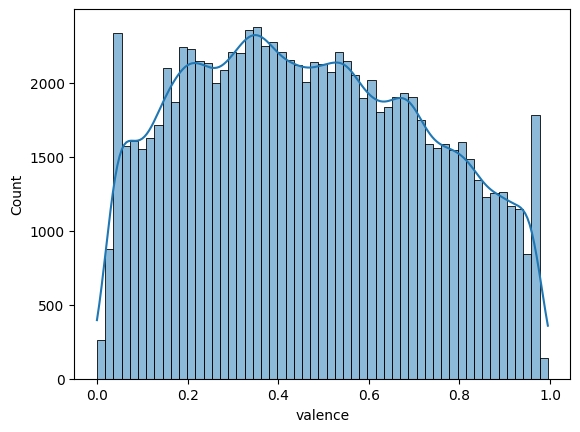

In [20]:
sns.histplot(df2.valence, kde=True)

<AxesSubplot:xlabel='loudness', ylabel='danceability'>

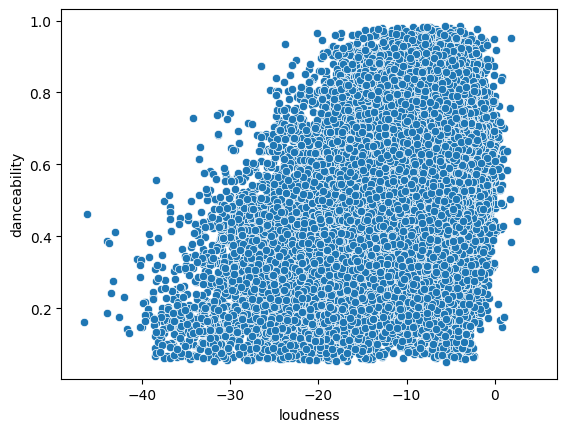

In [21]:
sns.scatterplot(data=df2, x='loudness', y='danceability')

In [22]:
df2.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

# Preproc

In [23]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [24]:
keep_columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

cat_col = ['key', 'mode', 'time_signature']

num_col = ['duration_ms', 'danceability', 'energy','loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

In [25]:
for col in cat_col:
    print(df2[col].value_counts(normalize=True))
    print('---------------')

7     0.117592
0     0.112215
2     0.104732
9     0.099580
1     0.094796
11    0.081864
4     0.081434
5     0.081026
6     0.069453
10    0.064158
8     0.062584
3     0.030566
Name: key, dtype: float64
---------------
1    0.634424
0    0.365576
Name: mode, dtype: float64
---------------
4    0.898437
3    0.077284
5    0.015641
1    0.008638
Name: time_signature, dtype: float64
---------------


<AxesSubplot:>

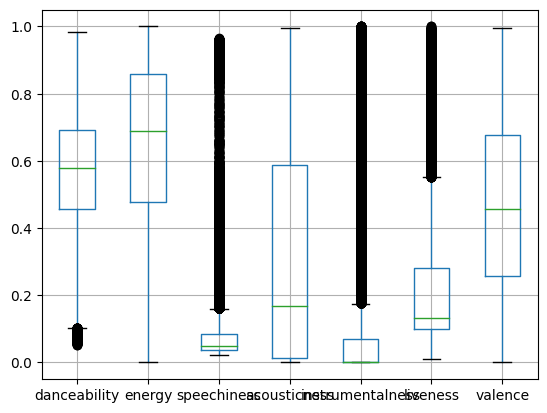

In [26]:
df2[['danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']].boxplot()

## Features preprocessing

In [27]:
import string
def basic_cleaning(sentence):
    # TODO: Apply all cleaning methods used above
    # 1. Lowercasing
    sentence = sentence.lower()
    # 2. Removing whitespaces
    sentence = sentence.strip()

    return sentence

In [28]:
df2_copy = df2.copy()

In [29]:
df2_copy['track_name'] = df2_copy['track_name'].map(lambda x: basic_cleaning(x))
df2_copy['artists'] = df2_copy['artists'].map(lambda x: basic_cleaning(x))


In [30]:
# Groupby artist name and track name, keeping only the most popular version of the song
df2_copy = df2_copy.groupby(['track_name', 'artists'], as_index=False).max()

In [31]:
X = df2_copy[keep_columns]

In [32]:
num_preproc = Pipeline([
    ("scaler", RobustScaler())
])
cat_preproc = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [33]:
preproc = make_column_transformer(
    (num_preproc, num_col),
    (cat_preproc, cat_col),
    remainder='drop'
)
preproc_pipe = make_pipeline(preproc)

In [34]:
X_preproc = preproc_pipe.fit_transform(X)

In [36]:
X_preproc.shape

(76314, 28)

# Model test

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [38]:
pca = PCA()
pca.fit(X_preproc)

PCA()

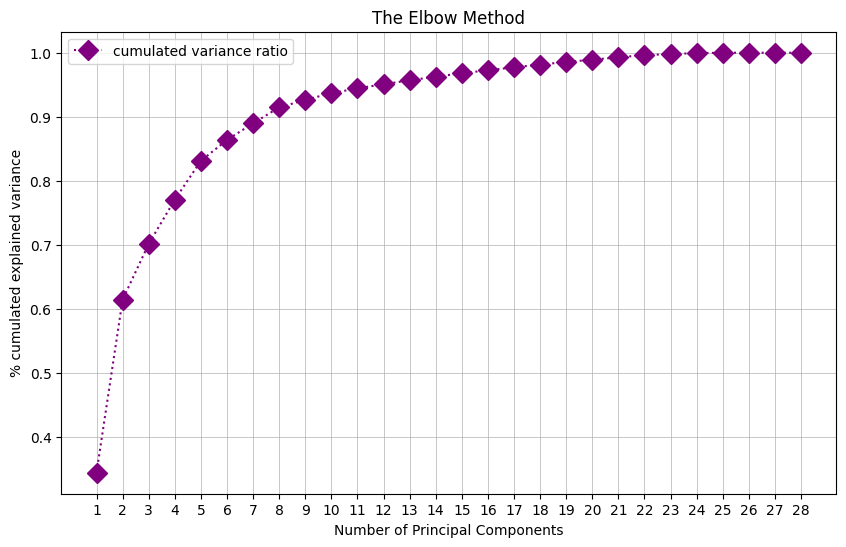

In [39]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)

    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

In [40]:
threhsold_pca = 10
pca = PCA(n_components=threhsold_pca, whiten=True)
pca.fit(X_preproc)
X_proj = pd.DataFrame(pca.transform(X_preproc))
X_proj

,0,1,2,3,4,5,6,7,8,9
0,1.147457,0.725275,-0.415206,-0.212712,1.180385,0.372320,1.289341,0.496068,-0.683058,0.695473
1,0.131647,-0.755679,-0.985748,0.332862,0.452679,0.923095,-0.823170,0.982791,1.537006,-0.068688
2,0.506131,-0.442884,-1.018229,-0.954980,0.713855,0.316088,0.723221,-0.485167,1.060377,0.579586
3,0.402432,-0.599335,0.112982,-0.900261,-1.106089,0.151341,0.032027,-1.219591,-0.576868,0.572759
4,0.495699,0.119877,0.912800,0.238720,0.332345,-2.358365,0.342560,-0.655129,0.146480,1.331501
...,...,...,...,...,...,...,...,...,...,...
76309,0.019298,-0.681387,-0.600044,1.390025,0.139955,-1.292505,0.386882,-0.026086,-0.948496,-1.472404
76310,0.409286,-0.541776,-0.029347,-0.543359,0.481665,0.005833,0.258295,-1.140591,0.315246,-0.151656
76311,-1.936830,1.323293,-1.369493,0.461175,-0.027711,-0.631349,1.137384,0.826204,-1.479079,-0.653339
76312,-1.970917,1.170385,-0.521381,0.129003,0.044899,-0.135185,1.702485,1.245191,0.131113,-1.250862


In [41]:
kmeans_pca = KMeans(n_clusters = 8)
kmeans_pca.fit(X_proj)
kmeans_pca

/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [42]:
nb_clusters_to_try = np.arange(1,115,1)
nb_clusters_to_try

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [43]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(X_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 3 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 4 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 5 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 6 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 7 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 8 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 9 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 10 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 11 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 12 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 13 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 14 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 15 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 16 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 17 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 18 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 19 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 20 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 21 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 22 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 23 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 24 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 25 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 26 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 27 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 28 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 29 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 30 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 31 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 32 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 33 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 34 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 35 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 36 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 37 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 38 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 39 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 40 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 41 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 42 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 43 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 44 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 45 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 46 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 47 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 48 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 49 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 50 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 51 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 52 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 53 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 54 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 55 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 56 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 57 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 58 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 59 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 60 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 61 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 62 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 63 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 64 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 65 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 66 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 67 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 68 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 69 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 70 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 71 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 72 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 73 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 74 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 75 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 76 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 77 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 78 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 79 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 80 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 81 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 82 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 83 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 84 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 85 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 86 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 87 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 88 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 89 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 90 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 91 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 92 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 93 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 94 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 95 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 96 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 97 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 98 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 99 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 100 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 101 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 102 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 103 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 104 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 105 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 106 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 107 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 108 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 109 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 110 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 111 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 112 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 113 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 114 clusters...


/Users/youssef/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DONE !


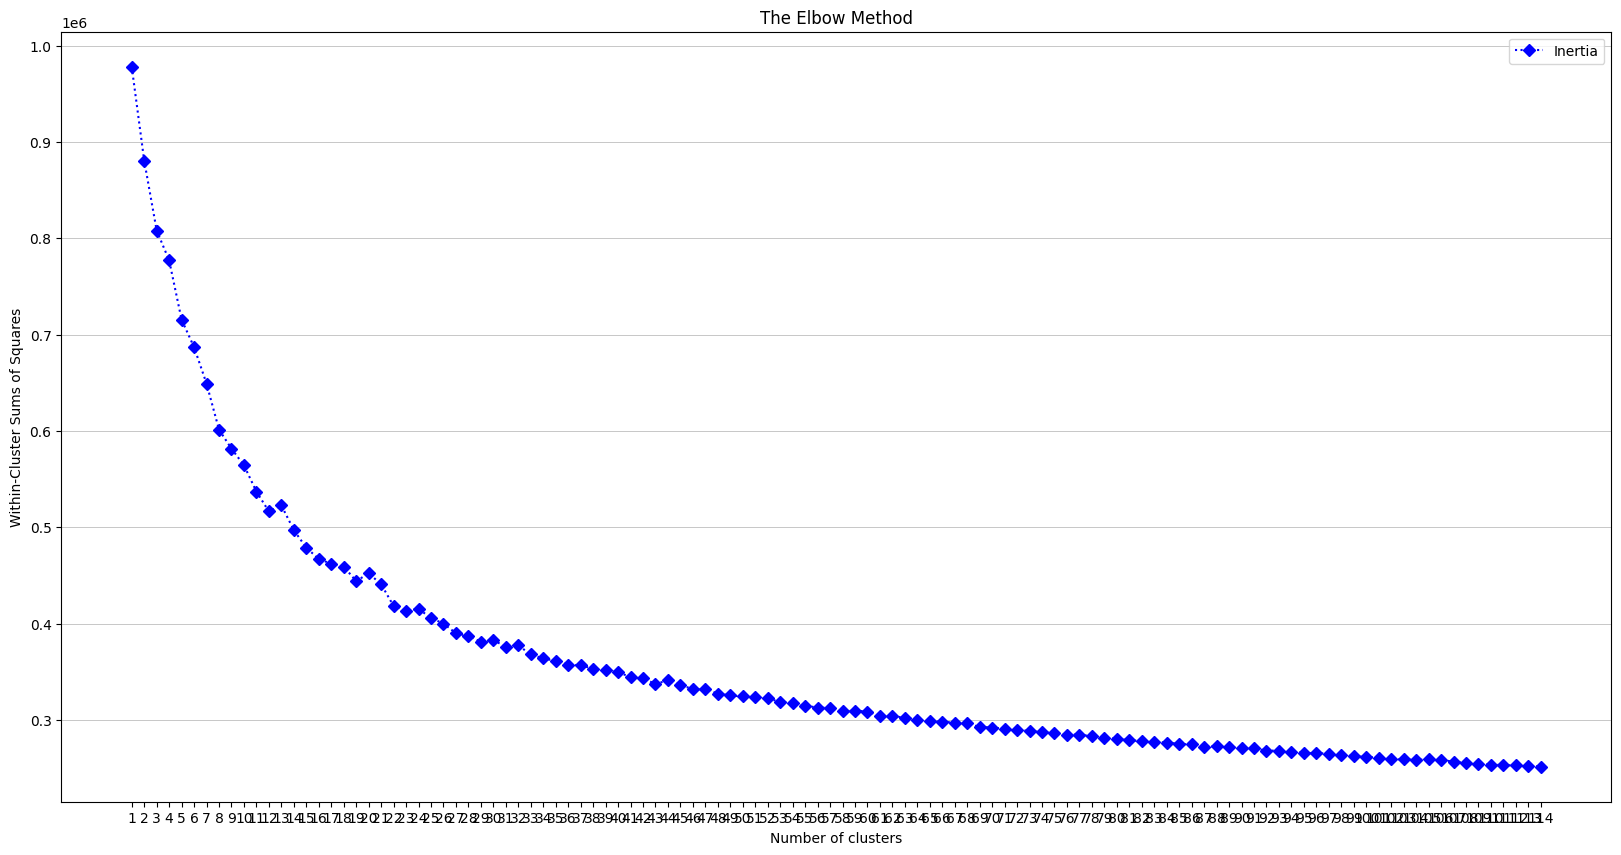

In [96]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    # annotate


    ax.grid(axis="y",linewidth=0.5)
    plt.show()

In [141]:
kmeans_114 = KMeans(n_clusters = 114)
kmeans_114.fit(X_proj)
labelling_114 = kmeans_114.labels_

In [143]:
X_label = pd.concat([df2_copy,pd.Series(labelling_114)],axis=1).rename(columns={0:"label"})
X_label[(X_label.label == 3)& (X_label.popularity < 10)]

,track_name,artists,track_id,album_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label
5214,automobile,kaleo,5IL61OxHy3t9W42qZOnw3m,All Bops,1,186906,False,0.692,0.5530,2,...,1,0.0389,0.596,0.000030,0.3050,0.3560,125.903,4,indie,3
5226,autumn,paolo nutini,2RVWKbMCQwaIAJS5FXNanZ,Autumn Hits,2,170240,False,0.599,0.0854,9,...,1,0.0414,0.978,0.000080,0.0858,0.3230,111.954,4,soul,3
12093,coffee time,natalie cole,0VXJD6Gf5pUmEvMdvgcuBM,Coffee Break,1,148333,False,0.748,0.3100,8,...,1,0.0448,0.488,0.000000,0.1360,0.4990,129.924,4,soul,3
14008,damn love,the dirt drifters,37BsVvcowpcSncSooQPVCg,"Origins (Demos, Vol. 1)",9,187193,False,0.667,0.4080,3,...,1,0.0331,0.379,0.000360,0.1160,0.4030,120.965,4,honky-tonk,3
14120,dancing in the dark,juanes,0N8d25eR5OMLON40UYIukg,tardes tranqui,1,244680,False,0.629,0.4860,8,...,1,0.0305,0.497,0.000000,0.1170,0.3820,122.011,4,rock,3
14273,dark side,bishop briggs,7EcqMNBI50oElY49no2wYY,LoFi & Halloween,2,208773,False,0.713,0.5500,9,...,1,0.0650,0.613,0.000001,0.0887,0.1300,138.070,4,alternative,3
16540,doggone,tim mcgraw,6m239N2EPkMYkN5unIYT9F,Sad Country Songs,1,215906,False,0.629,0.5380,1,...,1,0.0290,0.416,0.000011,0.1070,0.3530,121.256,4,country,3
20192,every little thing,carly pearce,5YzfH7DTvRUf6l3ebJG0c0,Sad Country Songs,2,181053,False,0.639,0.4270,0,...,1,0.0368,0.434,0.000011,0.0903,0.3220,139.899,4,country,3
23423,gammi,disjecta,7AWRP5rrMaHilI2bvFXPzw,Clean Pit & Lid,8,468333,False,0.715,0.3910,0,...,1,0.0562,0.307,0.042400,0.3110,0.1190,137.805,4,idm,3
24058,girls girls girls,fletcher,7iQeIx7Ko1Wfemi46OpQL4,Mega Hits Autumn/Fall 2022,1,161247,False,0.649,0.4780,0,...,1,0.1560,0.658,0.000000,0.1310,0.4680,139.859,4,electro,3


In [144]:
X_label

,track_name,artists,track_id,album_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label
0,!i'll be back!,rilès,0fROT4kK5oTm8xO8PX6EJF,!I'll Be Back!,52,178533,True,0.823,0.612,1,...,1,0.2480,0.168000,0.000000,0.1090,0.6880,142.959,4,french,85
1,"""a"" you're adorable",brian hyland,1hH0t381PIXmUVWyG1Vj3p,The Bashful Blond,39,151680,False,0.615,0.375,0,...,0,0.0319,0.482000,0.000000,0.1110,0.9220,110.720,4,rockabilly,6
2,"""c"" is for cookie",little apple band,73lXf5if6MWVWnsgXhK8bd,The Favorite Songs Of Sesame Street,32,86675,False,0.664,0.812,3,...,1,0.0886,0.132000,0.000010,0.0794,0.8710,118.443,4,kids,43
3,"""contemplate this on the tree of woe.""",dillinger four,5Zx0Rrkn5RFBMD2PRxX3mI,C I V I L W A R,24,180706,False,0.565,0.977,11,...,1,0.0546,0.028200,0.001320,0.4330,0.3870,106.478,4,power-pop,27
4,"""devils never cry""(スタッフロール)",capcom sound team,3ozivYJGJGq6TSzdy8m64X,デビル メイ クライ 3 オリジナル・サウンドトラック,55,319906,False,0.264,0.951,7,...,1,0.1460,0.000894,0.044200,0.1270,0.1590,149.990,4,anime,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76309,내 맘을 볼 수 있나요,heize,2oVHb8wyg6oC2iNpGBNvx1,Hotel del Luna (Original Television Soundtrack...,63,225785,False,0.397,0.166,9,...,1,0.0349,0.884000,0.000000,0.1000,0.1310,134.708,4,k-pop,104
76310,시작,gaho,4kIpBfvK44bxqX7zo8K1oP,ITAEWON CLASS (Original Television Soundtrack)...,65,202440,False,0.591,0.818,4,...,1,0.0730,0.172000,0.000000,0.1260,0.5740,108.107,4,k-pop,75
76311,약속 (piano solo),yiruma,4mHc7LUlO3k6AXeFV2EiJK,Yiruma Official Album 'Piano Therapy' (The Ori...,37,144533,False,0.504,0.143,1,...,1,0.0701,0.980000,0.922000,0.1240,0.0584,148.786,4,new-age,82
76312,원펀맨 theme - sad theme,goda,0tQesiSZJQOdHeAC7r59us,One Punch Man (Original Soundtrack),37,228000,False,0.542,0.337,2,...,1,0.0539,0.985000,0.933000,0.1470,0.4430,159.951,4,piano,82


In [114]:
df2.groupby(['track_name', 'artists'], as_index=False).sum()

,track_name,artists,track_id,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,!I'll Be Back!,Rilès,0fROT4kK5oTm8xO8PX6EJF,!I'll Be Back!,52,178533,1,0.823,0.612,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
1,"""A"" You're Adorable",Brian Hyland,1hH0t381PIXmUVWyG1Vj3p,The Bashful Blond,39,151680,0,0.615,0.375,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
2,"""C"" IS FOR COOKIE",Little Apple Band,1B45DvGMoFWdbAEUH2qliG,The Favorite Songs Of Sesame Street,32,84305,0,0.553,0.812,3,-5.542,1,0.0558,0.1320,0.000010,0.0794,0.8710,118.368,4,kids
3,"""C"" is for Cookie",Little Apple Band,73lXf5if6MWVWnsgXhK8bd,Sesame Street and Friends,8,86675,0,0.664,0.611,3,-8.687,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,4,kids
4,"""Contemplate This on the Tree of Woe.""",Dillinger Four,5Zx0Rrkn5RFBMD2PRxX3mI,C I V I L W A R,24,180706,0,0.565,0.977,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76434,내 맘을 볼 수 있나요,HEIZE,2oVHb8wyg6oC2iNpGBNvx1,Hotel del Luna (Original Television Soundtrack...,63,225785,0,0.397,0.166,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
76435,시작,Gaho,4kIpBfvK44bxqX7zo8K1oP,ITAEWON CLASS (Original Television Soundtrack)...,65,202440,0,0.591,0.818,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
76436,약속 (Piano Solo),Yiruma,4mHc7LUlO3k6AXeFV2EiJK,Yiruma Official Album 'Piano Therapy' (The Ori...,37,144533,0,0.504,0.143,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
76437,원펀맨 Theme - Sad Theme,GODA,0tQesiSZJQOdHeAC7r59us,One Punch Man (Original Soundtrack),37,228000,0,0.542,0.337,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano
